# **Stock Analysis**


---


**Please find the required dataset here:** https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021


---



### **# Question 1:**
Find for each year the maximum traded volume.

### **# Question 2:**
Show the difference between the maximum price attained and the minimum price recorded for each year. Represent in a line trend

### **# Question 3:**
Find the day with the maximum price between opening and closing.

### **# Question 4:**
Create a model to predict the opening price based on the given data. Use ML data only.


In [3]:
# Importing the importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Load the CSV File
stockDataFrame = pd.read_csv('AAPL.csv')

In [5]:
# Show the top 50 row of the data set
stockDataFrame.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098578,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103376,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107739,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113409,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123877,55574400


In [6]:
# Show data set summary
stockDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


In [7]:
# Convert the Date column into date time format
stockDataFrame['Date'] = pd.to_datetime(stockDataFrame['Date'])

In [8]:
# Extract year from the 'Date' column and create a new column 'Year'
stockDataFrame['Year'] = stockDataFrame['Date'].dt.year

In [9]:
# Group the data by 'Year and find the maximum traded volumn for each year
maxVolumebyYear = stockDataFrame.groupby('Year')['Volume'].max()

In [10]:
# Dispaly the maximum traded volume of each year
print(maxVolumebyYear)

Year
1980     469033600
1981     231302400
1982     357078400
1983    2832345600
1984     626796800
1985     733980800
1986     904131200
1987     777280000
1988     680960000
1989    2127171200
1990     933732800
1991    1868372800
1992     848355200
1993    2120596800
1994     980134400
1995    1211963200
1996    1026625600
1997    4190480000
1998    2561350400
1999    3357558400
2000    7421640800
2001    1873670400
2002    1709467200
2003    1555708000
2004    2768427200
2005    3164716800
2006    2663768800
2007    3349298400
2008    3372969600
2009    1831634000
2010    1867110000
2011    1880998000
2012    1506120000
2013    1460852400
2014    1065523200
2015     648825200
2016     533478800
2017     447940000
2018     384986800
2019     365248800
2020     426510000
2021     195432700
2022     179935700
Name: Volume, dtype: int64


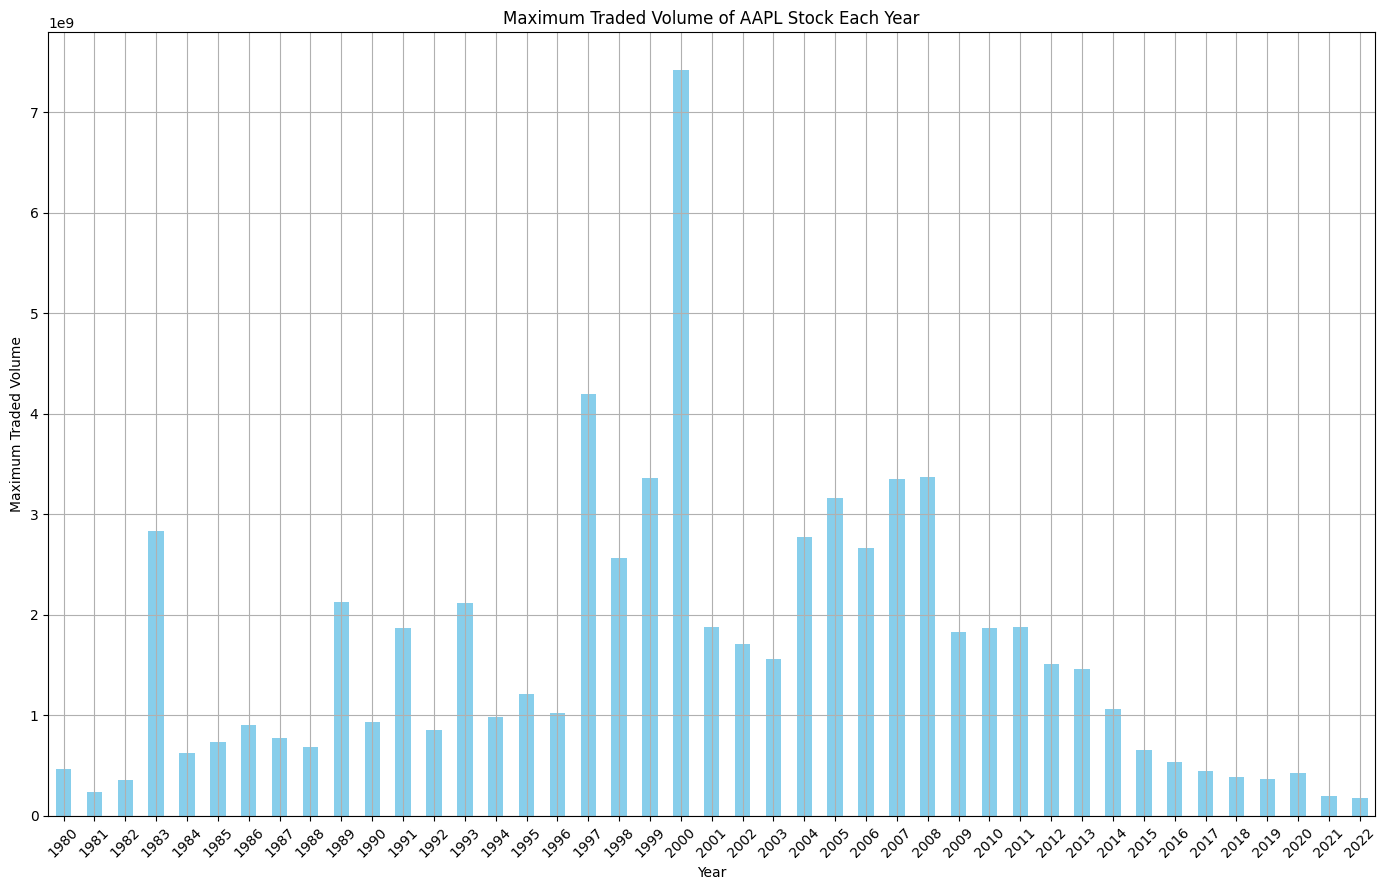

In [11]:
# Plot the graph for each year the maximum traded volume.
plt.figure(figsize=(14, 9))
maxVolumebyYear.plot(kind='bar', color='skyblue')
plt.title('Maximum Traded Volume of AAPL Stock Each Year')
plt.xlabel('Year')
plt.ylabel('Maximum Traded Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Group the data by 'Year' and calculate the difference between maximum and minimum price for each year
priceDiffbyYear = stockDataFrame.groupby('Year').apply(lambda x: x['High'].max() - x['Low'].min())

In [13]:
print(priceDiffbyYear)

Year
1980     0.048549
1981     0.091518
1982     0.106585
1983     0.205357
1984     0.055804
1985     0.074219
1986     0.098773
1987     0.354353
1988     0.109375
1989     0.159598
1990     0.209821
1991     0.294643
1992     0.254464
1993     0.386160
1994     0.170759
1995     0.165179
1996     0.174107
1997     0.150112
1998     0.270089
1999     0.767857
2000     1.099330
2001     0.226473
2002     0.228750
2003     0.219464
2004     0.864107
2005     1.577143
2006     1.535714
2007     4.323571
2008     4.325714
2009     4.848214
2010     4.871786
2011     4.150000
2012    10.573927
2013     6.787143
2014    12.310715
2015    10.634998
2016     7.305001
2017    15.609998
2018    21.720001
2019    37.992500
2020    85.637493
2021    65.920006
2022    32.839996
dtype: float64


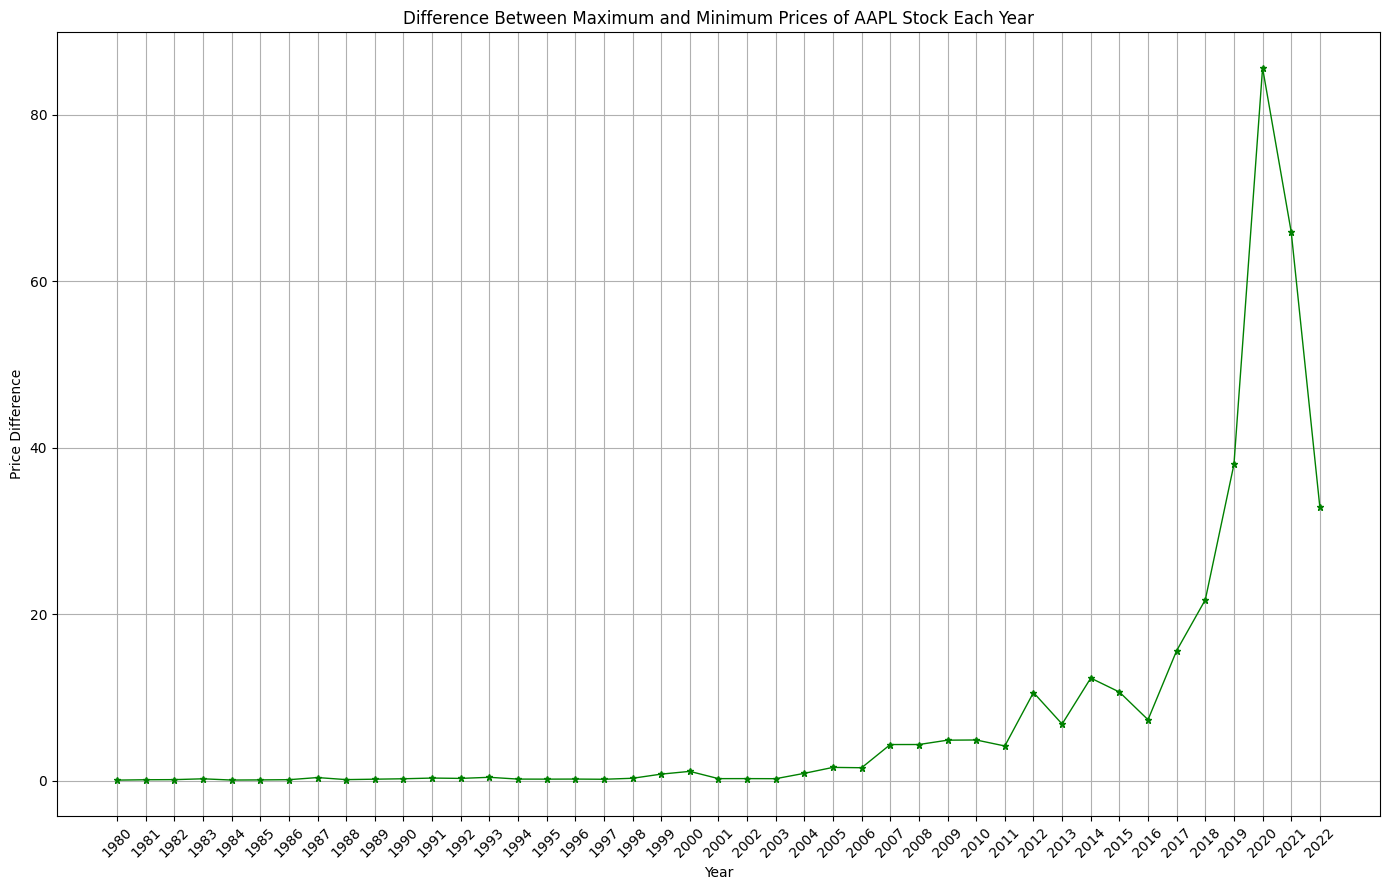

In [14]:
# Plot the graph
plt.figure(figsize=(14, 9))
priceDiffbyYear.plot(kind='line', marker='*', color='green', linestyle='-', linewidth=1, markersize=5)
plt.title('Difference Between Maximum and Minimum Prices of AAPL Stock Each Year')
plt.xlabel('Year')
plt.ylabel('Price Difference')
plt.xticks(priceDiffbyYear.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Calculate the difference between opening and closing prices
stockDataFrame['Price_Difference'] = stockDataFrame['Close'] - stockDataFrame['Open']

In [16]:
# Find the row with the maximum price difference
maxPriceRow = stockDataFrame.loc[stockDataFrame['Price_Difference'].idxmax()]

In [17]:
# Print the date with the maximum price difference
print("Date with Maximum Price Difference:", maxPriceRow['Date'].strftime('%Y-%m-%d'))

Date with Maximum Price Difference: 2022-02-24


In [18]:
# Splitting data into features (X) and target variable (y)
X = stockDataFrame.drop(columns=['Open', 'Date'])  # Features
y = stockDataFrame['Open']  # Target variable

In [19]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

In [21]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

In [23]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 0.25702840527661713


In [25]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Opening Price")
plt.ylabel("Predicted Opening Price")
plt.title("Actual vs Predicted Opening Price")
plt.show()

NameError: name 'y_test' is not defined